In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section 1: Data Preparation and Visualization of dataset

In [2]:
X_train = pd.read_csv('Linear_X_Train.csv')
y = pd.read_csv('Linear_Y_Train.csv')
print(type(X_train))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


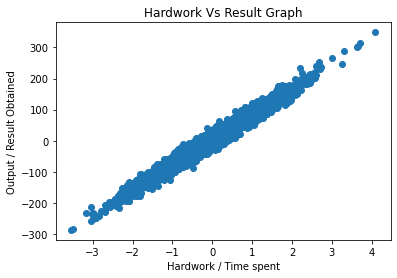

In [3]:
plt.scatter(X_train,y)
plt.title("Hardwork Vs Result Graph")
plt.xlabel("Hardwork / Time spent")
plt.ylabel("Output / Result Obtained")
plt.show()

In [4]:
#Normalisation of the elements in the dataset
X = X_train.values
print(X)
y = y.values
u = np.mean(X)
std = np.std(X)
X = (X-u)/std
print(X)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
[[-0.25352061]
 [-0.55541377]
 [ 1.07380656]
 ...
 [-0.26950343]
 [ 1.72730762]
 [-0.4575866 ]]


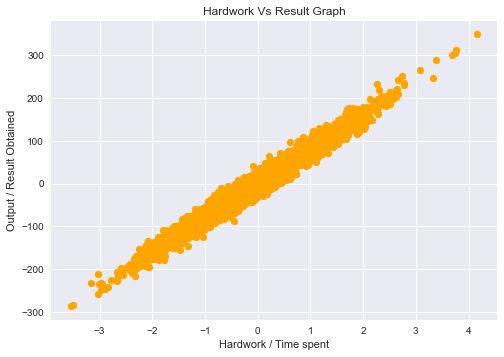

In [5]:
#After normalisation the dataset will look like
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork Vs Result Graph")
plt.xlabel("Hardwork / Time spent")
plt.ylabel("Output / Result Obtained")
plt.show()

### Section 2: Implementing Gradient Descent Algorithm

In [6]:
#Defining a hypothesis function for y_
def hypothesis(x,theta):
    #theta = [theta0,theta1]
    y_ = theta[1]*x + theta[0]
    return y_

#Defining gradient of a function, this function computes two values grad[0] and grad[1]
def gradient(X,Y,theta):
    m=X.shape[0]
    #grad = [grad0,grad1]
    grad = np.zeros((2,))
    #In order to calculate gradient, we have to iterate over every example and take its sum, therefore
    for i in range(m):
        x=X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    
    return grad/m

#Defining a function to calculate error, J(theta)
#the function returns average error
def error(X,Y,theta):
    n=X.shape[0]
    tot_err = 0.0
    for i in range(n):
        y_ = hypothesis(X[i],theta)
        tot_err += (y_ - Y[i])**2
    
    return tot_err/n

In [7]:
#Defining the function to compute Gradient Descent Algorithm
def GradDesc(X,Y,epochs=100,learning_rate= 0.1):
    theta = np.zeros((2,))
    #making an error list to keep a check on the reducing value of error
    err_list = []
    for i in range(epochs):
        #Calculating grad to be put for updation of theta values
        grad=gradient(X,Y,theta)
        # In every iteration calculating error values and appending the error value in the list
        e = error(X,Y,theta)
        err_list.append(e)
        #Updating the theta values
        theta[0] =  theta[0] -  learning_rate*grad[0]
        theta[1] =  theta[1] -  learning_rate*grad[1]
        
    return theta,err_list

In [8]:
theta,error = GradDesc(X,y)

In [9]:
#We have got our theta values
print(theta)
#This shows the value pf error is continuosly decreasing
print("\n",error)

[ 0.6838508  79.90361453]

 [array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653

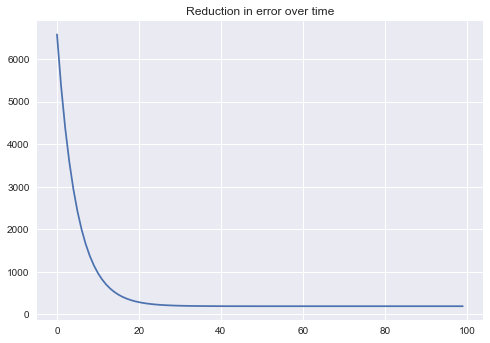

In [10]:
plt.plot(error)
plt.title("Reduction in error over time")
plt.show()

### Making predictions on training data

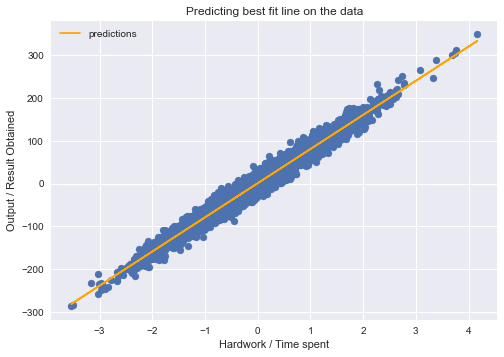

In [11]:
y_ = hypothesis(X,theta)
#plotting training data and our predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label='predictions')
plt.title("Predicting best fit line on the data")
plt.xlabel("Hardwork / Time spent")
plt.ylabel("Output / Result Obtained")
plt.legend()
plt.show()

### Making predictions on test data

In [12]:
X_test = pd.read_csv('Linear_X_Test.csv').values
Y_pred = hypothesis(X_test,theta)

In [13]:
#storing thr y_test predictions in the same format as y_train dataset
newdf = pd.DataFrame(data=Y_pred,columns=["y"])

In [14]:
newdf.to_csv('predicted.csv',index=False)